In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(style="ticks", color_codes=True)

In [2]:
df_raw = pd.read_csv("../dataset/google-play-store-apps/googleplaystore.csv")

In [3]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# First Look


Most of the types are in object form except the ratings.


In [7]:
df_raw.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
df_raw = df_raw.dropna()

In [18]:
df_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
df_raw['Reviews'] = df_raw['Reviews'].astype(int);
df_raw['Price'] = df_raw['Price'].astype(str);
df_raw['Size'] = df_raw['Size'].astype(str);
df_raw['Installs'] = df_raw['Installs'].astype(str);

In [33]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [47]:
df_raw['Size']  = df_raw['Size'].map(lambda x: x.rstrip('MmKk'))
df_raw = df_raw[df_raw['Size'] != 'Varies with device']
df_raw['Size'] = df_raw['Size'].astype(float)

In [81]:
#df_raw['Installs']  = df_raw['Installs'].map(lambda x: x.rstrip('+'))
#df_raw['Installs'] = df_raw['Installs'].str.replace(',', '', regex=False)
df_raw['Installs'] = df_raw['Installs'].astype('category')

In [50]:
df_raw['Price']  = df_raw['Price'].map(lambda x: x.lstrip('$'))
df_raw['Price'] = df_raw['Price'].str.replace(',', '', regex=False)
df_raw['Price'] = df_raw['Price'].astype(float)

In [68]:
#df_raw['Last Updated'] = df_raw['Last Updated'].str.replace(' |,', "")
df_raw['Last Updated'] = pd.to_datetime(df_raw['Last Updated'], format='%B%d%Y')
df_raw['Category'] = df_raw['Category'].astype('category')
df_raw['Type'] = df_raw['Type'].astype('category')
df_raw['Content Rating'] = df_raw['Content Rating'].astype('category')
df_raw['Genres'] = df_raw['Genres'].astype('category')
df_raw['Current Ver'] = df_raw['Current Ver'].astype('category')
df_raw['Android Ver'] = df_raw['Android Ver'].astype('category')
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [69]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [96]:
df_raw.describe()

,Rating,Reviews,Size,Price
count,7723.000000,7.723000e+03,7723.00000,7723.000000
mean,4.173935,2.948983e+05,37.30707,1.128169
std,0.544638,1.863933e+06,93.54223,17.408036
min,1.000000,1.000000e+00,1.00000,0.000000
25%,4.000000,1.075000e+02,6.10000,0.000000
50%,4.300000,2.332000e+03,16.00000,0.000000
75%,4.500000,3.905300e+04,37.00000,0.000000
max,5.000000,4.489389e+07,994.00000,400.000000


[Text(0,0,'1.0'),
 Text(0,0,'5.0'),
 Text(0,0,'10.0'),
 Text(0,0,'50.0'),
 Text(0,0,'100.0'),
 Text(0,0,'500.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'5000.0'),
 Text(0,0,'10000.0'),
 Text(0,0,'50000.0'),
 Text(0,0,'100000.0'),
 Text(0,0,'500000.0'),
 Text(0,0,'1000000.0'),
 Text(0,0,'5000000.0'),
 Text(0,0,'10000000.0'),
 Text(0,0,'50000000.0'),
 Text(0,0,'100000000.0'),
 Text(0,0,'500000000.0'),
 Text(0,0,'1000000000.0')]

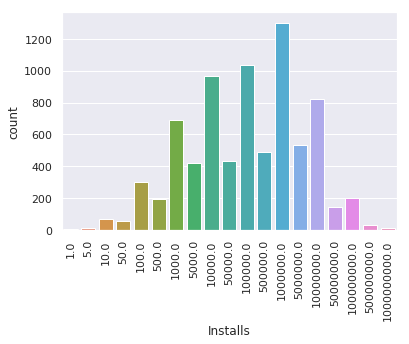

In [94]:
g = sns.countplot(df_raw['Installs']);
g.set_xticklabels(g.get_xticklabels(), rotation=90)

ValueError: left cannot be >= right

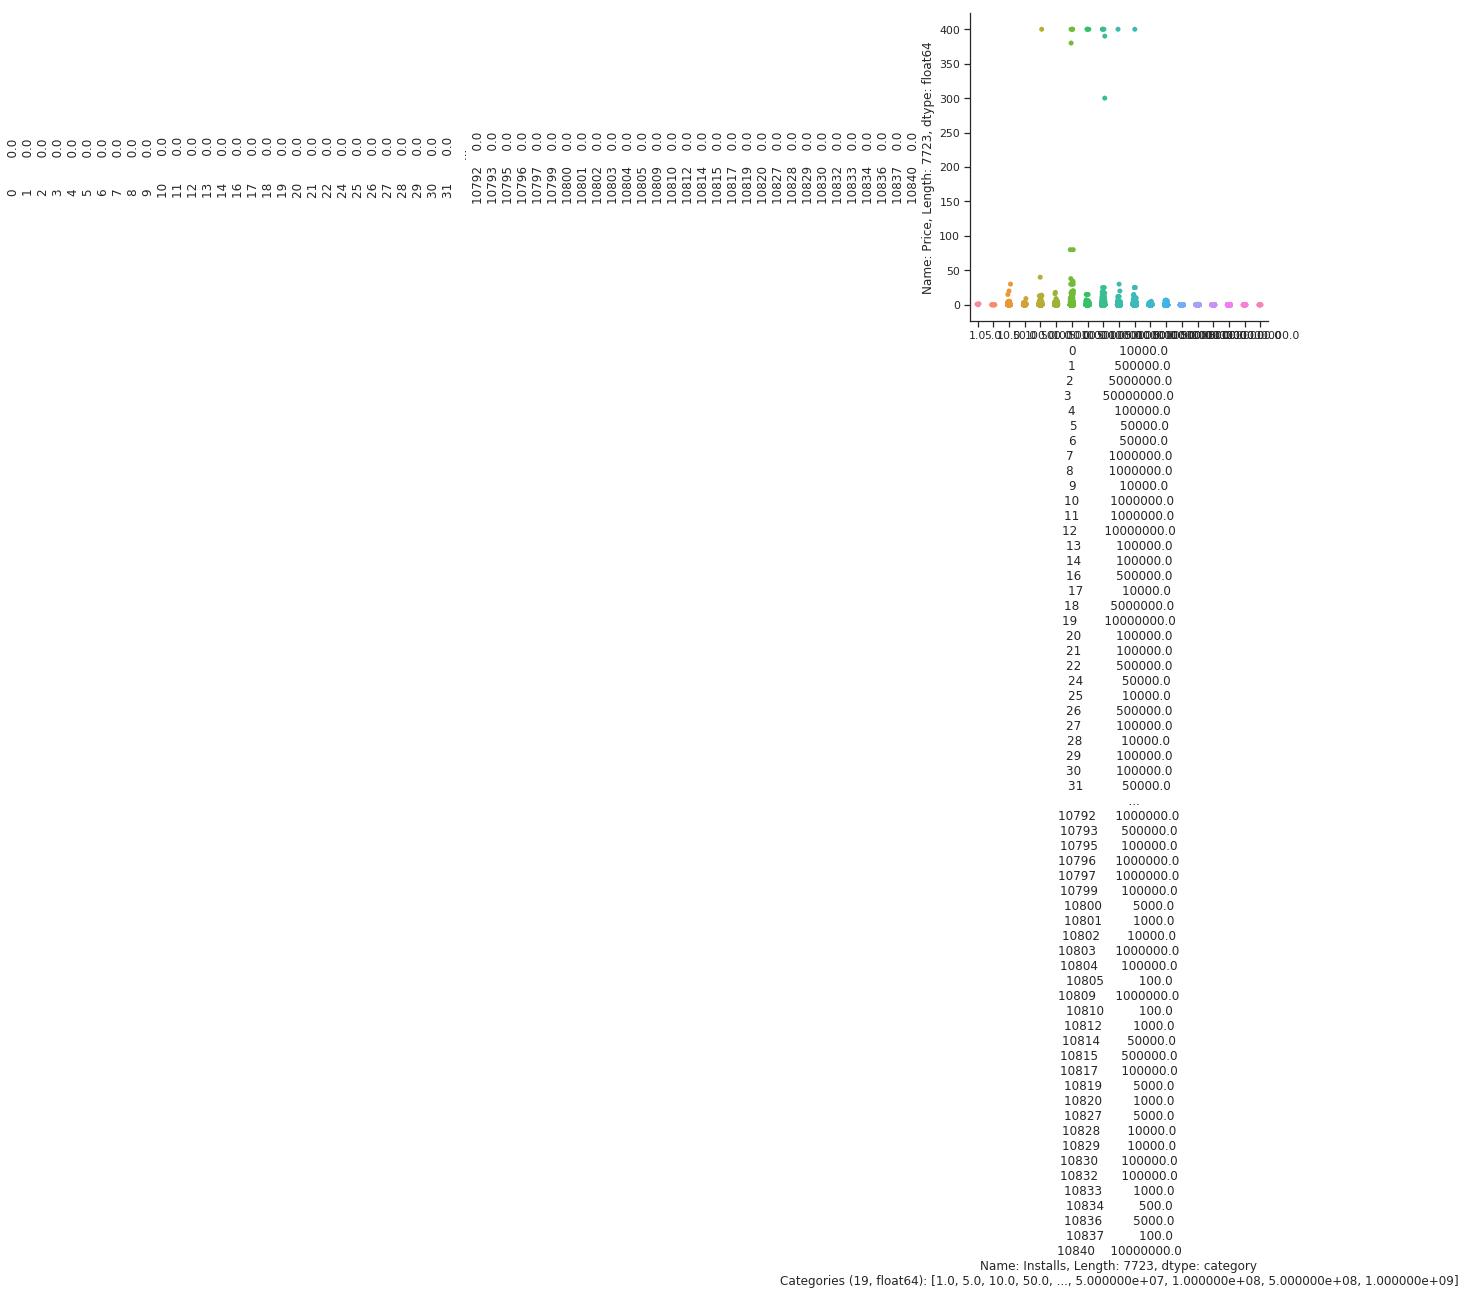

In [104]:
sns.catplot(x=df_raw.Installs, y=df_raw.Price, data=df_raw);